<a href="https://colab.research.google.com/github/oasquared/Hello-world/blob/master/NLP_Description_for_Students_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive


### Part 1)



- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is to ...
  1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense
  1. Also output the sentiment of the overview of the target person



In [1]:
import numpy as np
import pandas as pd

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

pd.options.display.max_columns = 100

import nltk
# nltk.download('omw-1.4')
nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
data='https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv'
data=pd.read_csv(data)

In [3]:
data.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if not already done
nltk.download('vader_lexicon')

# Load dataset
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
df = pd.read_csv(url)

# Ensure 'name' and 'text' columns exist
assert 'name' in df.columns and 'text' in df.columns

# Target person
target_name = "Digby Morrell"
if target_name not in df['name'].values:
    raise ValueError(f"{target_name} not found in the dataset.")

# Get index of target
target_index = df[df['name'] == target_name].index[0]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['text'])

# K-Nearest Neighbors
knn = NearestNeighbors(n_neighbors=11, metric='cosine')  # 11 to include target itself
knn.fit(tfidf_matrix)
distances, indices = knn.kneighbors(tfidf_matrix[target_index])

# Get top 10 nearest neighbors (excluding the target)
neighbor_indices = indices[0][1:]  # skip the first, which is the target itself
similar_people = df.iloc[neighbor_indices][['name', 'text']]

print("\nTop 10 people most similar to Digby Morrell:")
for i, row in similar_people.iterrows():
    print(f"- {row['name']}")

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
target_text = df.loc[target_index, 'text']
sentiment_score = sia.polarity_scores(target_text)['compound']

if sentiment_score >= 0.05:
    sentiment = "Positive"
elif sentiment_score <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"\nSentiment of Digby Morrell's text: {sentiment} (compound = {sentiment_score})")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Top 10 people most similar to Digby Morrell:
- Steven Browne
- Peter Freeman (footballer)
- Lindsay Smith (Australian footballer)
- Earl Spalding
- Relton Roberts
- Mark Austin (footballer)
- Todd Curley
- Daniel Harris (footballer)
- Richard Ambrose
- Darren Pfeiffer

Sentiment of Digby Morrell's text: Positive (compound = 0.8225)


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if not already done
nltk.download('vader_lexicon')

# Load dataset
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
df = pd.read_csv(url)

# Set correct column names
name_col = 'name'     # column containing names
text_col = 'text'     # column containing overviews

# Validate column names
assert name_col in df.columns and text_col in df.columns

# Select target person
target_name = "Digby Morrell"
target_index = df[df[name_col] == target_name].index[0]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df[text_col])

# Fit KNN model
knn = NearestNeighbors(n_neighbors=11, metric='cosine')  # 11 to include self
knn.fit(tfidf_matrix)
distances, indices = knn.kneighbors(tfidf_matrix[target_index])

# Process top 10 (excluding self)
neighbor_indices = indices[0][1:]
neighbor_distances = distances[0][1:]
similarities = 1 - neighbor_distances  # cosine similarity

# Output top 10 similar people with similarity scores
print(f"\nTop 10 people most similar to {target_name}:\n")
for rank, (idx, sim) in enumerate(zip(neighbor_indices, similarities), 1):
    print(f"{rank}. {df.iloc[idx][name_col]} — Similarity: {sim:.4f}")

# Sentiment analysis of target person's text
sia = SentimentIntensityAnalyzer()
target_text = df.iloc[target_index][text_col]
compound_score = sia.polarity_scores(target_text)['compound']

# Interpret sentiment
if compound_score >= 0.05:
    sentiment = "Positive"
elif compound_score <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"\nSentiment of {target_name}'s overview: {sentiment} (compound = {compound_score:.4f})")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Top 10 people most similar to Digby Morrell:

1. Steven Browne — Similarity: 0.4212
2. Peter Freeman (footballer) — Similarity: 0.3628
3. Lindsay Smith (Australian footballer) — Similarity: 0.3499
4. Earl Spalding — Similarity: 0.3417
5. Relton Roberts — Similarity: 0.3390
6. Mark Austin (footballer) — Similarity: 0.3272
7. Todd Curley — Similarity: 0.3243
8. Daniel Harris (footballer) — Similarity: 0.3223
9. Richard Ambrose — Similarity: 0.3214
10. Darren Pfeiffer — Similarity: 0.3207

Sentiment of Digby Morrell's overview: Positive (compound = 0.8225)


### Part 2)



- For the same target person that you chose in Part 1), use the Wikipedia API to access the whole content of the target person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the target person
  1. Determine the sentiment of the text of the Wikipedia page for the target person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.



 ## Using Wikipedia API

In [7]:
%%capture
!pip3 install wikipedia-api
!pip install wikipedia

In [8]:
import wikipediaapi

In [9]:
topic = "Digby Morrell"
wikip = wikipediaapi.Wikipedia('foobar')
page_ex = wikip.page(topic)
wiki_text = page_ex.text
wiki_text


"Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).\nFrom Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the North Melbourne Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.\nAfter the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with th

In [10]:
wiki_text_clean = (
  wiki_text
  .lower()
  .replace("\n"," ")
  .replace("\'s",'')
  .replace('\'','')
  .replace("(", "")
  .replace(")", "")
  .replace('"', "")
)
wiki_text_clean

'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league afl. from western australia, morrell played his early senior football for west perth. his 44-game senior career for the falcons spanned 1998–2000, and he was the club leading goalkicker in 2000. at the age of 21, morrell was recruited to the australian football league by the north melbourne football club with its third round selection in the 2001 afl rookie draft. as a forward he twice kicked five goals during his time with the kangaroos. the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbane. after the 2003 season, morrell was traded, along with david teague, to the carlton football club in exchange for corey mckernan. he played 32 games for the blues before being delisted at the end of 2005. he continued to play victorian football league vfl football with the northern

In [11]:
wiki_blob = TextBlob(wiki_text_clean)
wiki_blob

TextBlob("digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league afl. from western australia, morrell played his early senior football for west perth. his 44-game senior career for the falcons spanned 1998–2000, and he was the club leading goalkicker in 2000. at the age of 21, morrell was recruited to the australian football league by the north melbourne football club with its third round selection in the 2001 afl rookie draft. as a forward he twice kicked five goals during his time with the kangaroos. the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbane. after the 2003 season, morrell was traded, along with david teague, to the carlton football club in exchange for corey mckernan. he played 32 games for the blues before being delisted at the end of 2005. he continued to play victorian football league vfl football with the

In [12]:
import wikipediaapi
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment of full Wikipedia page for Digby Morrell: Positive (compound = 0.8402)

Comparison of Part 1 vs Wikipedia ranking:
                                    name  part1_rank  wiki_rank  rank_diff
0                          Steven Browne           1          2          1
1             Peter Freeman (footballer)           2          7          5
2  Lindsay Smith (Australian footballer)           3          9          6
3                          Earl Spalding           4          3          1
4                         Relton Roberts           5          6          1
5               Mark Austin (footballer)           6         10          4
6                            Todd Curley           7          1          6
7             Daniel Harris (footballer)           8          4          4
8                        Richard Ambrose           9          8          1
9                        Darren Pfeiffer          10          5          5


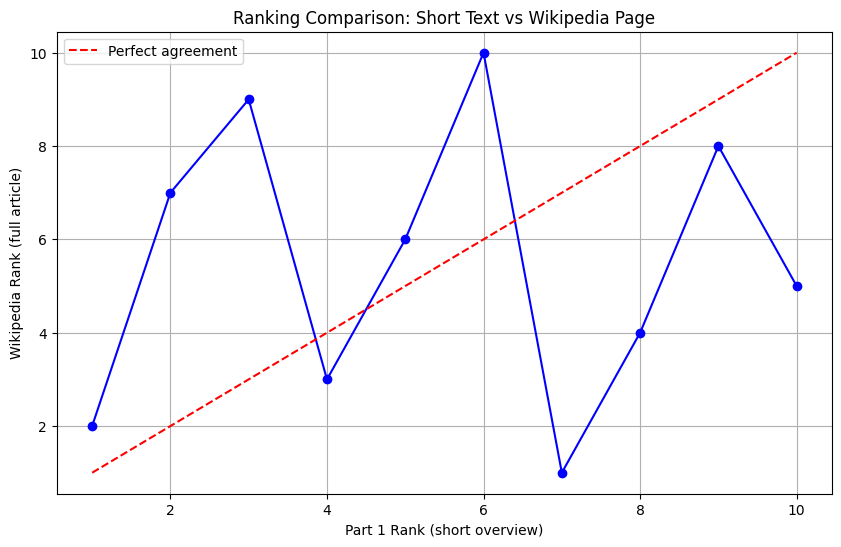

In [13]:
import pandas as pd
import wikipedia
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Download VADER if not already done
nltk.download('vader_lexicon')

# -----------------------
# Step 1: Target and top 10 neighbors (from Part 1)
target_name = "Digby Morrell"
top_10_names = [
    # Replace these names with the actual names from your Part 1 results
  'Steven Browne',
 'Peter Freeman (footballer)',
 'Lindsay Smith (Australian footballer)',
 'Earl Spalding',
 'Relton Roberts',
 'Mark Austin (footballer)',
 'Todd Curley',
 'Daniel Harris (footballer)',
 'Richard Ambrose',
 'Darren Pfeiffer']

# -----------------------
# Step 2: Download Wikipedia articles
def get_wikipedia_page(person_name):
    try:
        return wikipedia.page(person_name).content
    except Exception as e:
        print(f"Could not retrieve page for {person_name}: {e}")
        return ""

# Get target page
target_text = get_wikipedia_page(target_name)

# Get neighbor pages
neighbor_pages = {}
for name in top_10_names:
    neighbor_pages[name] = get_wikipedia_page(name)

# -----------------------
# Step 3: Sentiment of full Wikipedia page (target)
sia = SentimentIntensityAnalyzer()
compound = sia.polarity_scores(target_text)['compound']
sentiment = (
    "Positive" if compound >= 0.05 else
    "Negative" if compound <= -0.05 else
    "Neutral"
)
print(f"\nSentiment of full Wikipedia page for {target_name}: {sentiment} (compound = {compound:.4f})")

# -----------------------
# Step 4: Compute similarities using full pages
# Combine target with neighbors
full_texts = [target_text] + [neighbor_pages[name] for name in top_10_names]
names = [target_name] + top_10_names

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(full_texts)

# Cosine similarity from target to all
cos_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:]).flatten()

# Create new ranking based on Wikipedia article similarity
wiki_rank_df = pd.DataFrame({
    'name': top_10_names,
    'wiki_similarity': cos_sim
}).sort_values(by='wiki_similarity', ascending=False).reset_index(drop=True)
wiki_rank_df['wiki_rank'] = wiki_rank_df.index + 1

# -----------------------
# Step 5: Compare to Part 1 rank
# Simulate Part 1 rank for plotting (you'll replace with actual order)
part1_rank_df = pd.DataFrame({
    'name': top_10_names,
    'part1_rank': list(range(1, 11))
})

# Merge rankings
comparison = pd.merge(part1_rank_df, wiki_rank_df, on='name')
comparison['rank_diff'] = abs(comparison['part1_rank'] - comparison['wiki_rank'])

# Print comparison
print("\nComparison of Part 1 vs Wikipedia ranking:")
print(comparison[['name', 'part1_rank', 'wiki_rank', 'rank_diff']])

# -----------------------
# Step 6: Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(comparison['part1_rank'], comparison['wiki_rank'], 'bo-')
plt.plot([1, 10], [1, 10], 'r--', label='Perfect agreement')
plt.xlabel("Part 1 Rank (short overview)")
plt.ylabel("Wikipedia Rank (full article)")
plt.title("Ranking Comparison: Short Text vs Wikipedia Page")
plt.legend()
plt.grid(True)
plt.show()


### Part 3)


Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


In [14]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


In [15]:
!pip install ipywidgets wikipedia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [16]:
# In Jupyter only; skip this in Colab
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [17]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets
from IPython.display import display, clear_output
import wikipedia

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv")

# Use correct columns
name_col = 'name'
text_col = 'text'

# Drop rows with missing text
df = df.dropna(subset=[text_col])

# TF-IDF model
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df[text_col])

# Fit NearestNeighbors
knn = NearestNeighbors(n_neighbors=11, metric='cosine')
knn.fit(tfidf_matrix)

# Sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Dropdown or text input for selecting person
dropdown = widgets.Dropdown(
    options=sorted(df[name_col].unique()),
    description='Pick a name:',
    layout=widgets.Layout(width='50%')
)

text_input = widgets.Text(
    placeholder='Enter a name (optional)',
    description='Or type one:',
    layout=widgets.Layout(width='50%')
)

run_button = widgets.Button(description="Find Similar People")

output = widgets.Output()

def on_run_clicked(b):
    with output:
        clear_output()

        # Choose user input
        person_name = text_input.value.strip() if text_input.value.strip() else dropdown.value

        if person_name not in df[name_col].values:
            print(f"'{person_name}' not found in dataset.")
            return

        # Get index
        idx = df[df[name_col] == person_name].index[0]

        # Find neighbors
        distances, indices = knn.kneighbors(tfidf_matrix[idx])
        neighbor_indices = indices[0][1:]
        neighbor_distances = distances[0][1:]
        similarities = 1 - neighbor_distances

        print(f"\nTop 10 people most similar to **{person_name}**:\n")
        for rank, (i, sim) in enumerate(zip(neighbor_indices, similarities), 1):
            print(f"{rank}. {df.iloc[i][name_col]} — Similarity: {sim:.4f}")

        # Sentiment
        text = df.iloc[idx][text_col]
        compound = sia.polarity_scores(text)['compound']
        sentiment = (
            "Positive" if compound >= 0.05 else
            "Negative" if compound <= -0.05 else
            "Neutral"
        )
        print(f"\nSentiment of {person_name}'s overview: {sentiment} (compound = {compound:.4f})")

        # BONUS (Optional): Wikipedia content
        try:
            wiki_text = wikipedia.page(person_name).content
            print(f"\n(Wikipedia article for {person_name} loaded successfully — {len(wiki_text)} characters.)")
        except:
            print("\nWikipedia article not found or ambiguous.")

run_button.on_click(on_run_clicked)

# Layout
display(dropdown, text_input, run_button, output)



Top 10 people most similar to ** Renate Lorenz**:

1. Rachel Aggs — Similarity: 0.3873
2. Enrico David — Similarity: 0.1193
3. Akiya Takahashi — Similarity: 0.1161
4. Steve Sabella — Similarity: 0.1021
5. Laurent Grasso — Similarity: 0.0996
6. NaoKo TakaHashi — Similarity: 0.0989
7. Sam Durant — Similarity: 0.0988
8. Robin Deacon — Similarity: 0.0941
9. James L. Brooks — Similarity: 0.0918
10. David Elliott (curator) — Similarity: 0.0897

Sentiment of  Renate Lorenz's overview: Positive (compound = 0.1027)

(Wikipedia article for  Renate Lorenz loaded successfully — 2943 characters.)
